# Computer Vision - Convolutional Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# import zipfile

# # Unzip the data
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## CNN Model - Binary Classification

### Pre-processing the data

In [3]:
# Dataset directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

In [4]:
# Train and test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [5]:
# Loading images and turning them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:
# Get a sample batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [7]:
# Number of batches
print(len(train_data), len(test_data))
# Based on the number of images
print(1500 / len(images))

47 16
46.875


In [8]:
# Check if the images were scaled on a batch sample
images[0], images[0].shape

(array([[[0.50980395, 0.54509807, 0.53333336],
         [0.5411765 , 0.5647059 , 0.54901963],
         [0.53333336, 0.5529412 , 0.5372549 ],
         ...,
         [0.50980395, 0.5372549 , 0.5058824 ],
         [0.50980395, 0.5294118 , 0.5019608 ],
         [0.5176471 , 0.5294118 , 0.5019608 ]],
 
        [[0.5176471 , 0.5529412 , 0.5411765 ],
         [0.5411765 , 0.5647059 , 0.54901963],
         [0.5372549 , 0.5568628 , 0.5411765 ],
         ...,
         [0.5058824 , 0.53333336, 0.5019608 ],
         [0.50980395, 0.5294118 , 0.5019608 ],
         [0.5254902 , 0.5372549 , 0.50980395]],
 
        [[0.5176471 , 0.5529412 , 0.5411765 ],
         [0.5372549 , 0.56078434, 0.54509807],
         [0.5411765 , 0.56078434, 0.54509807],
         ...,
         [0.49803925, 0.5254902 , 0.49411768],
         [0.49803925, 0.5176471 , 0.4901961 ],
         [0.5176471 , 0.5294118 , 0.5019608 ]],
 
        ...,
 
        [[0.5686275 , 0.59607846, 0.5647059 ],
         [0.5686275 , 0.5882353 , 0.56078

In [9]:
# View the batch labels
labels, labels.shape

(array([1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
       dtype=float32),
 (32,))

### Creating baseline CNN model

In [10]:
# Simplifying the model creation
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [11]:
# Creating 3-layer CNN model
model_cnn1 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [12]:
# Compiling the model
model_cnn1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [13]:
# Model summary
model_cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Legth of training and testing data in batches
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_cnn1 = model_cnn1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 82s 2s/step - loss: 0.0683 - accuracy: 0.9807 - val_loss: 0.4933 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 63s 1s/step - loss: 0.0121 - accuracy: 0.9993 - val_loss: 0.6190 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 68s 1s/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.5486 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 68s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5848 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 81s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5864 - val_accuracy: 0.8060


### Evaluating CNN model

<AxesSubplot:>

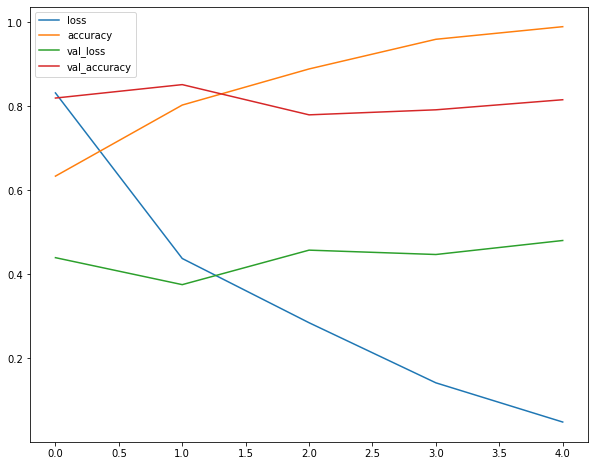

In [16]:
# Plotting the history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_cnn1.history).plot(figsize=(10, 8))

In [17]:
# Plotting function for each metric
def plot_loss_curves(history):
    # Loss values
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    # Accuracy values
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    # Number of epochs
    epochs = range(len(history.history["loss"]))

    # Plot losses
    plt.plot(epochs, loss, label="Training_Loss")
    plt.plot(epochs, val_loss, label="Validation_Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training_Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation_Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

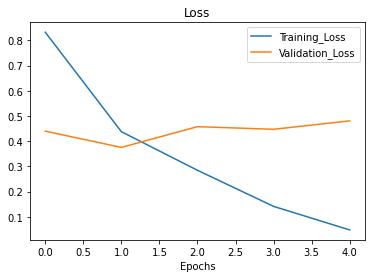

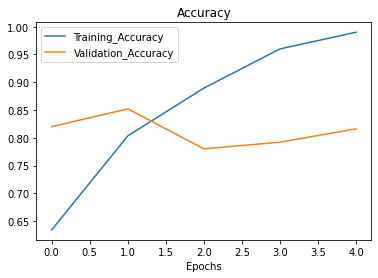

In [18]:
plot_loss_curves(history_cnn1)

### Adjusting parameters to improve CNN model's performance

In [19]:
# Creating a model
model_cnn2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [20]:
# Compiling the model
model_cnn2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [41]:
# Fit the model
history_cnn2 = model_cnn2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 35s 747ms/step - loss: 0.4502 - accuracy: 0.8093 - val_loss: 0.5080 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 43s 913ms/step - loss: 0.5020 - accuracy: 0.7627 - val_loss: 0.4968 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 42s 881ms/step - loss: 0.4441 - accuracy: 0.7967 - val_loss: 0.5548 - val_accuracy: 0.7100
Epoch 4/5
47/47 [==============================] - 26s 557ms/step - loss: 0.4417 - accuracy: 0.8080 - val_loss: 0.3532 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 26s 558ms/step - loss: 0.3845 - accuracy: 0.8340 - val_loss: 0.3540 - val_accuracy: 0.8500


In [22]:
# Model's summary
model_cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

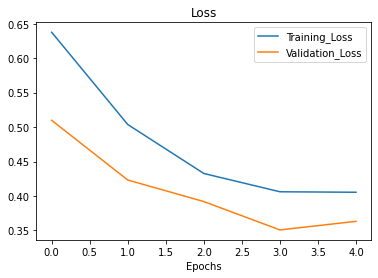

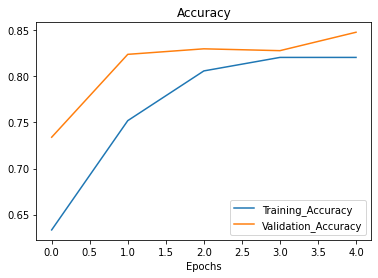

In [23]:
# Plotting the curves
plot_loss_curves(history_cnn2)

### Data augmentation

In [24]:
# Training data with augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Training data without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Test data without augmentation
test_datagen_augmented = ImageDataGenerator(rescale=1/255.)

In [25]:
# Augmented training data
print("Generating augmented training data:")
IMG_SIZE=(224, 224)
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Non-augmented training data
print("Generating non-augmented training data")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Non-augmented test data
print("Generating non-augmented test data")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="binary"
)

Generating augmented training data:
Found 1500 images belonging to 2 classes.
Generating non-augmented training data
Found 1500 images belonging to 2 classes.
Generating non-augmented test data
Found 500 images belonging to 2 classes.


In [26]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

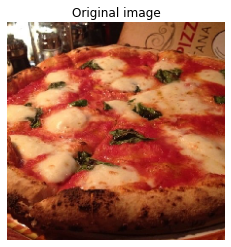

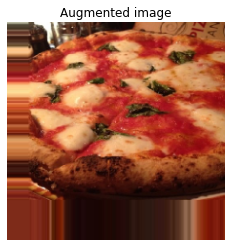

In [27]:
# Show the original and augmented images
import random
random_number = random.randint(0, 32) # Our batch size is 32
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

### Creating and testing CNN model on augmented data

In [28]:
# Create a model
model_cnn3 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_cnn3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_cnn3 = model_cnn3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 0.7688 - accuracy: 0.5507 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 48s 1s/step - loss: 0.7285 - accuracy: 0.3620 - val_loss: 0.6768 - val_accuracy: 0.5200
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.6796 - accuracy: 0.5553 - val_loss: 0.6508 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.6736 - accuracy: 0.5813 - val_loss: 0.6438 - val_accuracy: 0.5480
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.6488 - accuracy: 0.5940 - val_loss: 0.5897 - val_accuracy: 0.7420


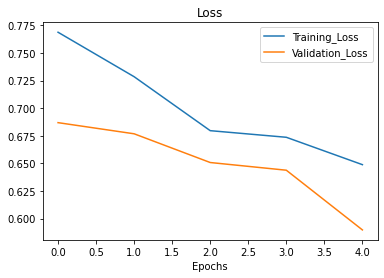

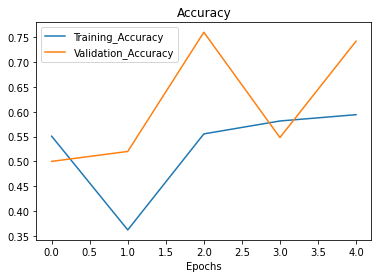

In [29]:
# Checking model's training curves
plot_loss_curves(history_cnn3)

### Changing augmented training data to shuffle and check the outcomes

In [30]:
# Enable shuffling
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [31]:
# Create a model
model_cnn4 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_cnn4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_cnn4 = model_cnn4.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 70s 1s/step - loss: 0.6430 - accuracy: 0.6160 - val_loss: 0.5301 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 63s 1s/step - loss: 0.5520 - accuracy: 0.7200 - val_loss: 0.4020 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.5165 - accuracy: 0.7540 - val_loss: 0.4109 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 47s 988ms/step - loss: 0.4812 - accuracy: 0.7800 - val_loss: 0.4518 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 43s 903ms/step - loss: 0.4741 - accuracy: 0.7873 - val_loss: 0.3817 - val_accuracy: 0.8340


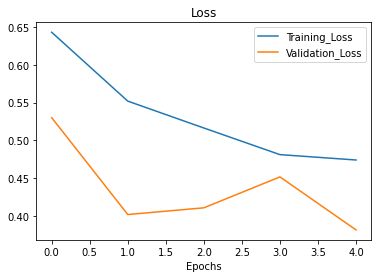

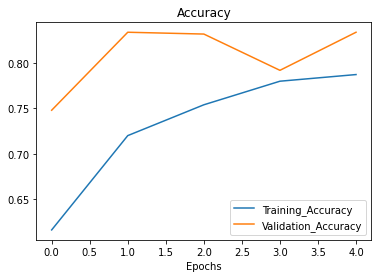

In [32]:
# Plotting the curves
plot_loss_curves(history_cnn4)

### Processing custom image

(-0.5, 3023.5, 4031.5, -0.5)

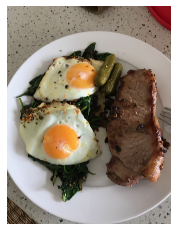

In [33]:
# View example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [34]:
# Image shape
steak.shape

(4032, 3024, 3)

In [36]:
# Testing prediction
model_cnn4.predict(steak)

# --------------------------
# THIS FAILES BECAUSE CUSTOM IMAGE IS NOT IN THE FORMAT EXPECTED BY THE MODEL
# --------------------------

ValueError: in user code:

    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


In [37]:
# Image dimension resize
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 4032, 3024, 3])

In [40]:
# Adjusting image size and making a new prediction
adjusted_steak = tf.expand_dims(steak, axis=0)
model_cnn4.predict(adjusted_steak)

# --------------------------
# THIS FAILES AGAIN BECAUSE CUSTOM IMAGE IS STILL NOT IN THE FORMAT EXPECTED BY THE MODEL
# --------------------------

ValueError: in user code:

    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\lturakulov\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 4032, 3024, 3)


### Helper function to pre-process custom images

In [42]:
# Creating a helper function
def load_and_prep_image(filename, img_shape=224):
    """
    Helper function that loads image, converts into tensor
    and then reshapes to (img_shape, img_shape, colour_channels) format
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the file into tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image in the diapason between 0 and 1
    img = img / 255.
    return img

In [43]:
# Load and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05